In [2]:
# imports 
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.data_loader import load_data, load_data_from_file
import seaborn as sns
import numpy as np


### Task

- Performing an exploratory data analysis over the santander dataset 

## Loading Dataset

In [3]:
location = '../data/raw/'
id = 45566
#raw_df = load_data(id=id,location=location)
raw_df = load_data_from_file(file_path=os.path.join(location, 'SantanderCustomerSatisfaction.csv'))

Loading dataset from file: ../data/raw/SantanderCustomerSatisfaction.csv...


# EDA

In [4]:
raw_df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,False
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,False
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,False
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,False
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,False


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, var_0 to target
dtypes: bool(1), float64(200)
memory usage: 305.4 MB


In [6]:
(
    raw_df
    .select_dtypes(include='number')
    .aggregate(['mean', 'std', 'min', 'max'])
)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
## unique values
(
    raw_df
    .nunique()
)

var_0       94672
var_1      108932
var_2       86555
var_3       74597
var_4       63515
            ...  
var_196    125560
var_197     40537
var_198     94153
var_199    149430
target          2
Length: 201, dtype: int64

In [8]:
def tweak_df(df):
    df = df.copy()
    df['target'] = df['target'].astype('category')
    return df
raw_df = tweak_df(raw_df)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, var_0 to target
dtypes: category(1), float64(200)
memory usage: 305.4 MB


### Missing values

In [10]:
(
    raw_df
    .select_dtypes(include='number')
    .isna()
    .sum()
    .loc[lambda x: x > 0]
) # no missing values

Series([], dtype: int64)

Text(0.5, 0, 'Target Value')

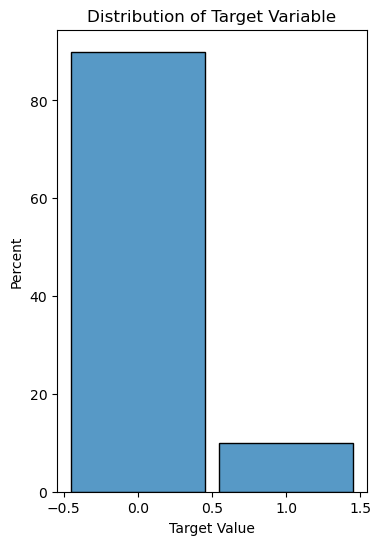

In [11]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.histplot(
    data=raw_df,
    x='target',
    ax=ax,
    binwidth=0.05,       
    shrink=0.9,
    stat='percent'           
)
ax.set_title('Distribution of Target Variable')
ax.set_xlabel('Target Value')

### the classes are highly inbalanced, only few are 1

C:\Users\marou\AppData\Local\Temp\ipykernel_34824\2538463834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\2538463834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\2538463834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

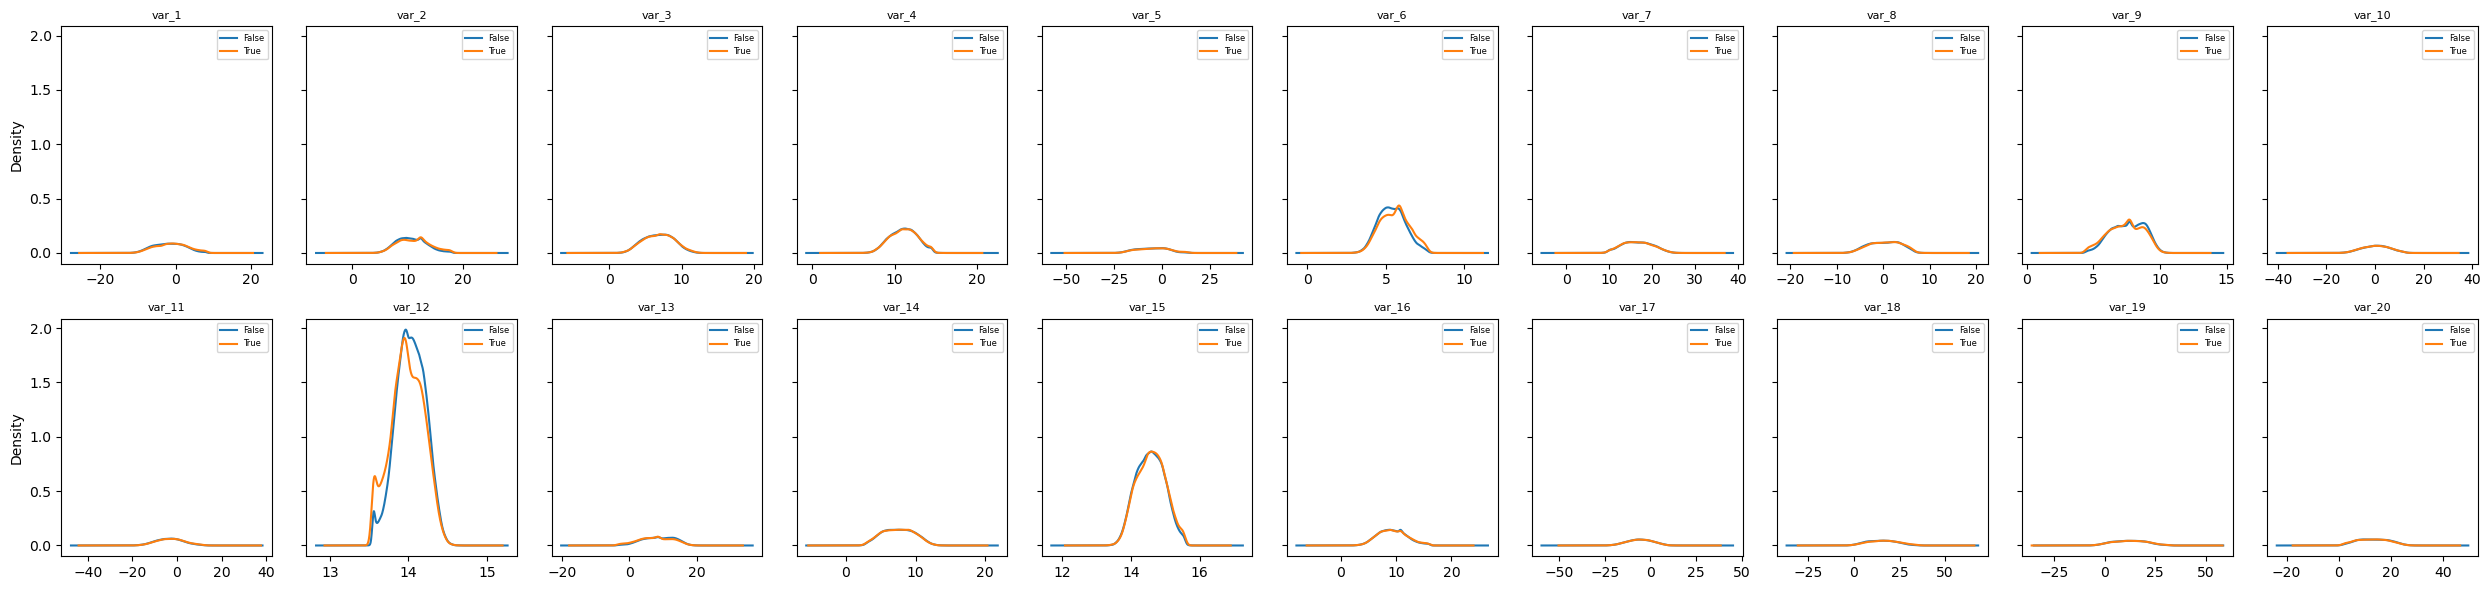

In [12]:
fig, axes = plt.subplots(2, 10, figsize=(25, 6), sharey=True)  
axes = axes.flatten()

for ax, name in zip(axes, range(1, 21)):
    for g_name, g_data in raw_df.groupby('target'):
        g_data[f'var_{name}'].plot.kde(ax=ax, label=str(g_name))
    ax.set_title(f'var_{name}', fontsize=8)
    ax.legend(fontsize=6)

fig.tight_layout()
plt.show()


### At least for the plotted variables we have kind of the same distribution, are these features even necessary ? -> should investigate more columns 

C:\Users\marou\AppData\Local\Temp\ipykernel_34824\565984196.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\565984196.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\565984196.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

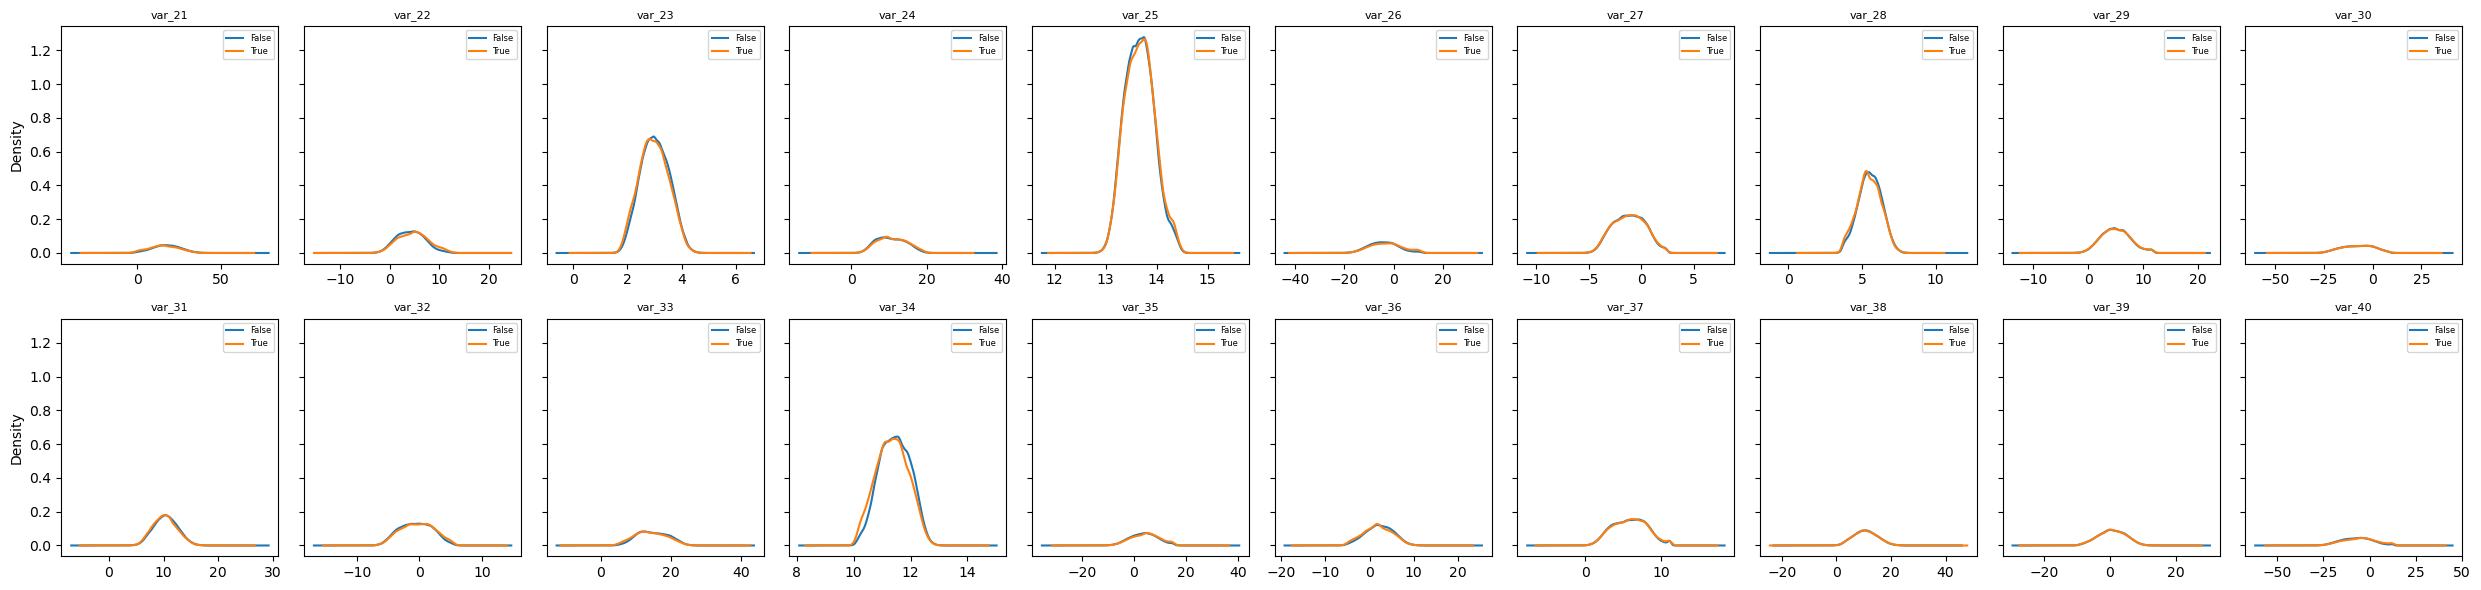

In [13]:
fig, axes = plt.subplots(2, 10, figsize=(25, 6), sharey=True)  

axes = axes.flatten()

for ax, name in zip(axes, range(21, 41)):
    for g_name, g_data in raw_df.groupby('target'):
        g_data[f'var_{name}'].plot.kde(ax=ax, label=str(g_name))
    ax.set_title(f'var_{name}', fontsize=8)
    ax.legend(fontsize=6)

fig.tight_layout()
plt.show()


### we also see no variation here 

C:\Users\marou\AppData\Local\Temp\ipykernel_34824\213410141.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\213410141.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\213410141.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

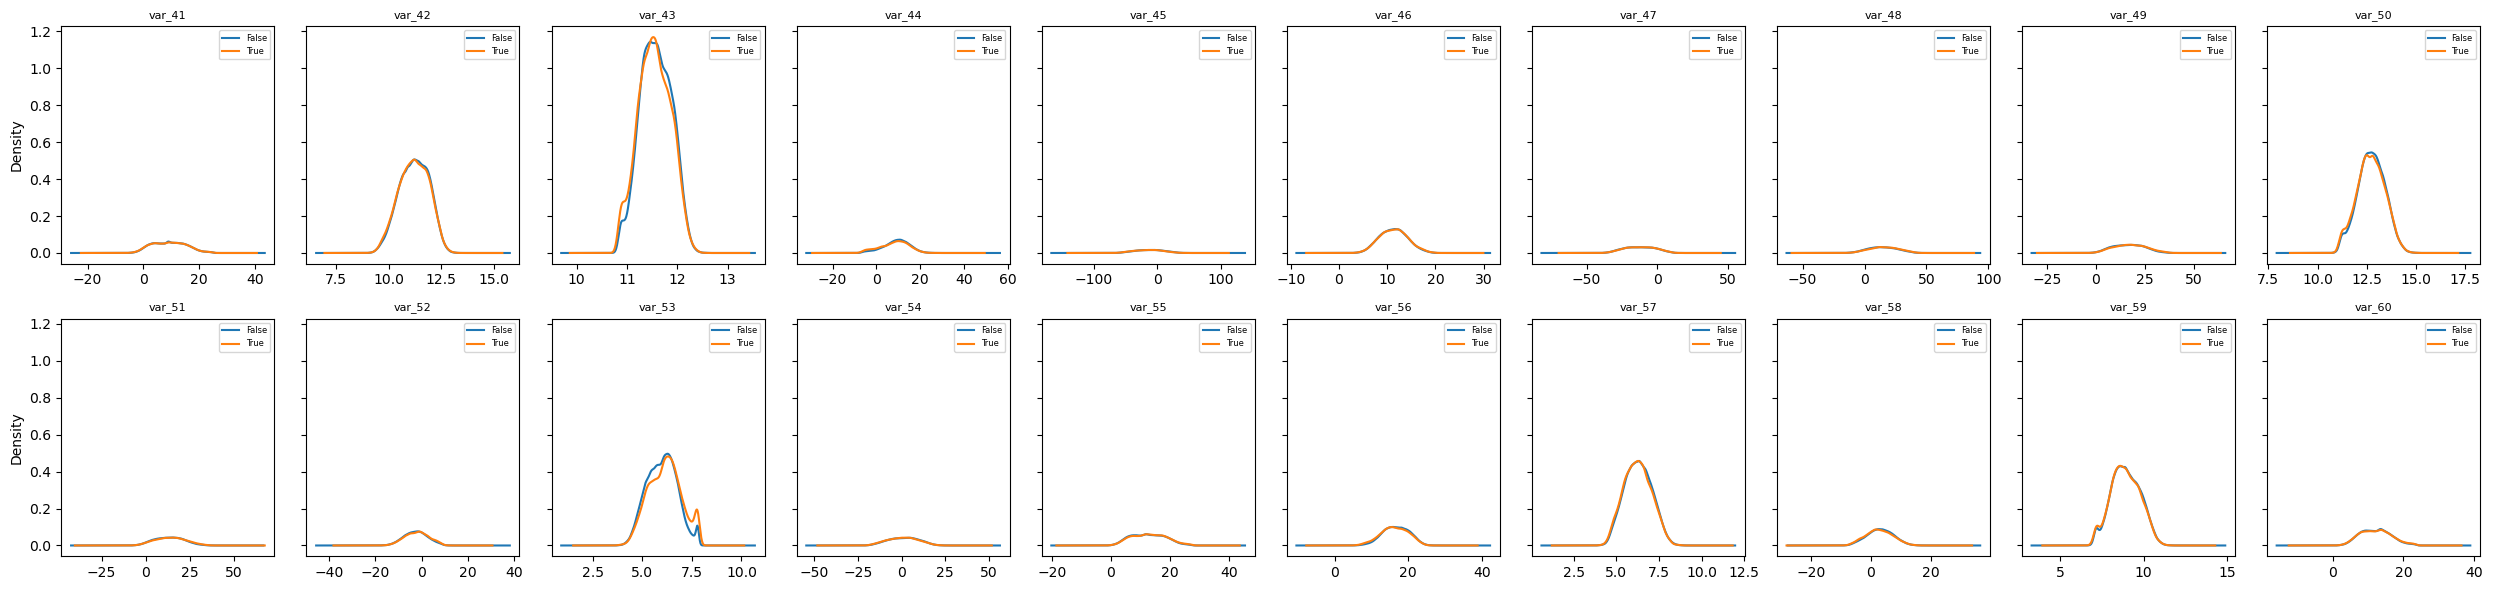

In [14]:
fig, axes = plt.subplots(2, 10, figsize=(25, 6), sharey=True)  

axes = axes.flatten()

for ax, name in zip(axes, range(41, 61)):
    for g_name, g_data in raw_df.groupby('target'):
        g_data[f'var_{name}'].plot.kde(ax=ax, label=str(g_name))
    ax.set_title(f'var_{name}', fontsize=8)
    ax.legend(fontsize=6)

fig.tight_layout()
plt.show()


C:\Users\marou\AppData\Local\Temp\ipykernel_34824\3106726282.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\3106726282.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g_name, g_data in raw_df.groupby('target'):
C:\Users\marou\AppData\Local\Temp\ipykernel_34824\3106726282.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

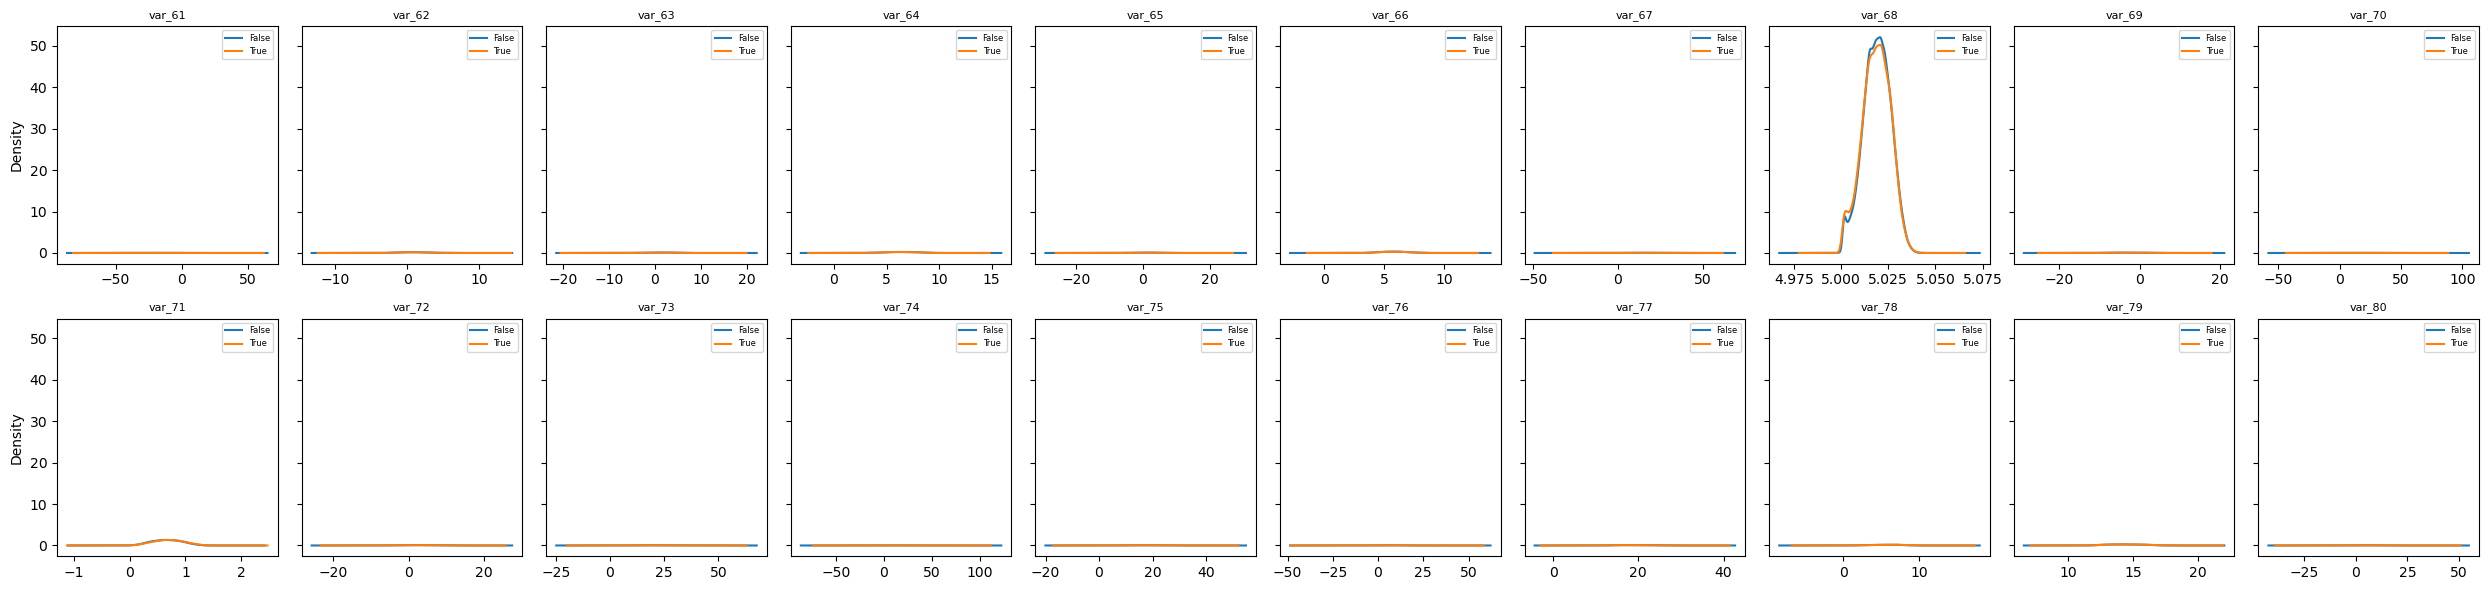

In [15]:
fig, axes = plt.subplots(2, 10, figsize=(25, 6), sharey=True)  

axes = axes.flatten()

for ax, name in zip(axes, range(61, 81)):
    for g_name, g_data in raw_df.groupby('target'):
        g_data[f'var_{name}'].plot.kde(ax=ax, label=str(g_name))
    ax.set_title(f'var_{name}', fontsize=8)
    ax.legend(fontsize=6)

fig.tight_layout()
plt.show()


In [16]:
corr_matrix = raw_df.corr(numeric_only=True)

In [29]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)
(
    corr_matrix
    .where(mask)
    .stack()
    #.loc[lambda x: x > 0.5]
) # no strong correlations

var_0    var_1     -0.000544
         var_2      0.006573
         var_3      0.003801
         var_4      0.001326
         var_5      0.003046
                      ...   
var_196  var_198    0.000253
         var_199    0.000607
var_197  var_198    0.001183
         var_199    0.004991
var_198  var_199   -0.004731
Length: 19900, dtype: float64

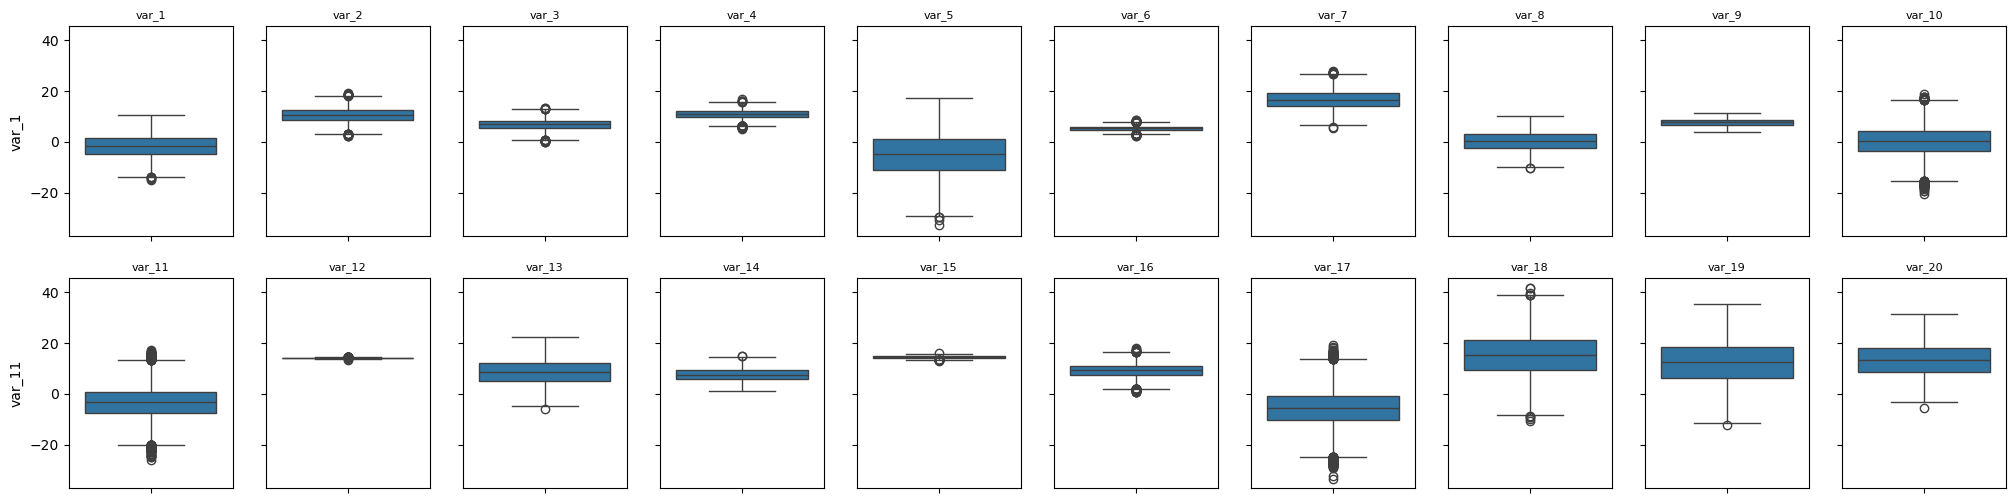

In [18]:
figure, ax = plt.subplots(2,10, figsize=(25, 6), sharey=True)
for ax, name in zip(ax.flatten(), range(1, 21)):
    sns.boxplot(data=raw_df[f'var_{name}'], ax=ax)
    ax.set_title(f'var_{name}', fontsize=8)

The number of the numeric features is high as well as anonymized. To get a feeling about the distribution of the columns we can plot the column means distribution and the std as well to get also a feeling about the **importance** and variability of columns  

<Axes: xlabel='mean', ylabel='Count'>

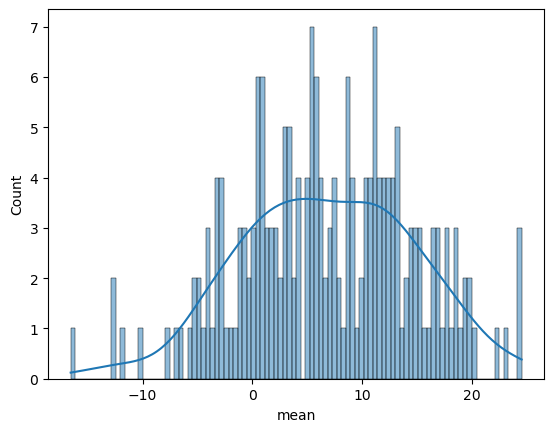

In [19]:
sns.histplot(data=raw_df.describe().T, x="mean", kde=True,bins=100)


some means are kinda dispersed but overall most of the means are centered over 5 more or less

<Axes: xlabel='std', ylabel='Count'>

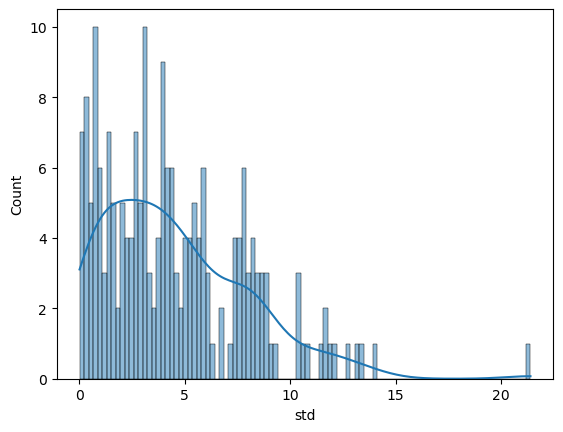

In [20]:
sns.histplot(data=raw_df.describe().T, x="std", kde=True,bins=100)


Its very remarquable that many features have std = 0, maybe we dont even need those for the ml model


### Duplicates 

In [21]:
(
    raw_df
    [raw_df.duplicated(keep=False) == True]    
)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target


### Missing values

In [ ]:
(
    raw_df
    .isna()
    .sum()
    .loc[lambda x: x > 0]
) # no missing values

Series([], dtype: int64)

# 🔎 Findings

- ✅ **No missing values** in the dataset  
- ✅ **No duplicates** in the dataset  
- 📊 The **distributions mostly overlap** (when grouped)  
- ⚠️ Several features have **standard deviation = 0** → may not be informative  
- 📈 Some feature means are **slightly dispersed**, but most are centered around ~5  
- 🕵️ Due to **anonymity of the data**, deeper insights are limited  
- 🔗 **No significant correlations** observed between variables 